In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

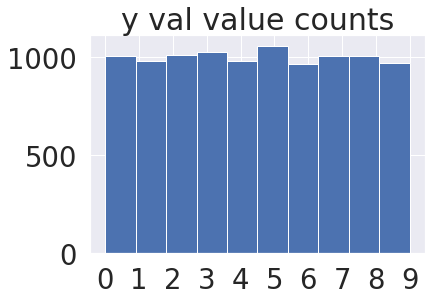

In [7]:
plt.hist(y_val)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title("y val value counts")
plt.show()

In [6]:
x_train.shape

(40000, 32, 32, 3)

In [7]:
y_train.shape

(40000, 1)

In [8]:
lst = []
for i,im in enumerate(y_train):
  if im==1:
    lst.append(i)
print(lst)
lst = np.array(lst)

[11, 17, 34, 40, 53, 57, 65, 69, 76, 80, 95, 116, 135, 140, 142, 144, 150, 152, 168, 172, 184, 188, 196, 197, 218, 227, 255, 259, 269, 272, 274, 290, 299, 311, 317, 318, 323, 325, 329, 337, 366, 387, 400, 413, 415, 436, 437, 448, 460, 477, 479, 480, 497, 507, 513, 520, 522, 542, 576, 595, 605, 612, 625, 651, 657, 671, 674, 675, 676, 682, 698, 719, 723, 729, 732, 733, 737, 740, 744, 755, 761, 765, 769, 771, 776, 783, 807, 809, 816, 819, 823, 826, 841, 847, 852, 905, 918, 923, 958, 962, 963, 964, 976, 979, 989, 992, 994, 1017, 1021, 1024, 1030, 1043, 1063, 1065, 1070, 1091, 1111, 1162, 1185, 1200, 1206, 1213, 1225, 1251, 1255, 1269, 1286, 1292, 1297, 1317, 1318, 1330, 1336, 1362, 1370, 1378, 1380, 1389, 1398, 1404, 1417, 1424, 1434, 1449, 1465, 1471, 1476, 1484, 1491, 1525, 1532, 1558, 1561, 1578, 1600, 1608, 1627, 1638, 1655, 1674, 1701, 1718, 1726, 1732, 1747, 1749, 1758, 1765, 1775, 1784, 1787, 1794, 1818, 1829, 1830, 1840, 1841, 1851, 1868, 1872, 1876, 1881, 1899, 1906, 1908, 1930, 1

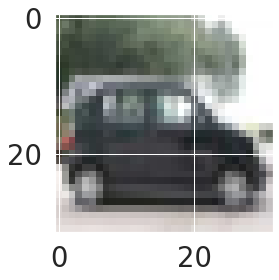

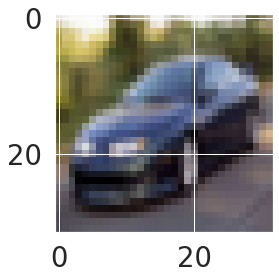

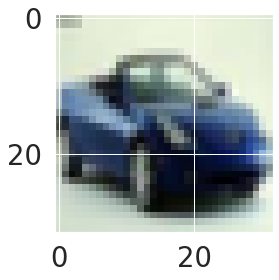

In [9]:
for i in range(3):
  plt.imshow(x_train[lst[i]])
  plt.show()

In [10]:
pre_model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
pre_model.trainable = False
pre_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [11]:
top_model = keras.Sequential()
top_model.add(pre_model)
top_model.add(layers.Flatten())
top_model.add(layers.Dense(256))
top_model.add(layers.Activation('relu'))
top_model.add(layers.Dense(10))
top_model.add(layers.Activation('softmax'))

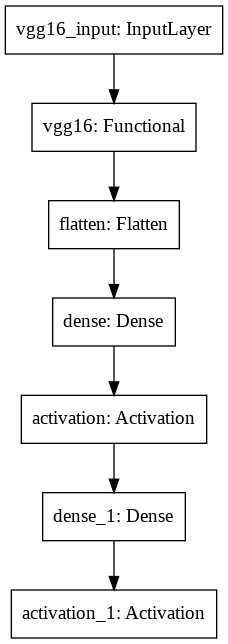

In [12]:
plot_model(top_model)

In [13]:
#Part A

In [14]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [15]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = val_datagen.flow(
    x_val,y_val
)
test_genrator = test_datagen.flow(
    x_test,y_test
)

In [16]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(128,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model_A = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [17]:
model_A.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0       

In [18]:
model_A.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [19]:
history_A = model_A.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 34s 28ms/step - loss: 2.5108 - sparse_categorical_accuracy: 0.1343 - val_loss: 2.1505 - val_sparse_categorical_accuracy: 0.2361
Epoch 2/500
39/39 [==============================] - 1s 18ms/step - loss: 2.1612 - sparse_categorical_accuracy: 0.2255 - val_loss: 2.0869 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/500
39/39 [==============================] - 1s 18ms/step - loss: 2.0177 - sparse_categorical_accuracy: 0.2832 - val_loss: 1.8784 - val_sparse_categorical_accuracy: 0.3507
Epoch 4/500
39/39 [==============================] - 1s 18ms/step - loss: 1.9956 - sparse_categorical_accuracy: 0.2973 - val_loss: 1.8140 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/500
39/39 [==============================] - 1s 18ms/step - loss: 1.9156 - sparse_categorical_accuracy: 0.2969 - val_loss: 1.8281 - val_sparse_categorical_accuracy: 0.3194
Epoch 6/500
39/39 [==============================] - 1s 18ms/step - loss: 1.8562 - sparse_categoric

In [20]:
model_A.evaluate(test_genrator,batch_size=64)


313/313 [==============================] - 1s 3ms/step - loss: 0.7655 - sparse_categorical_accuracy: 0.7351


[0.7654724717140198, 0.7350999712944031]

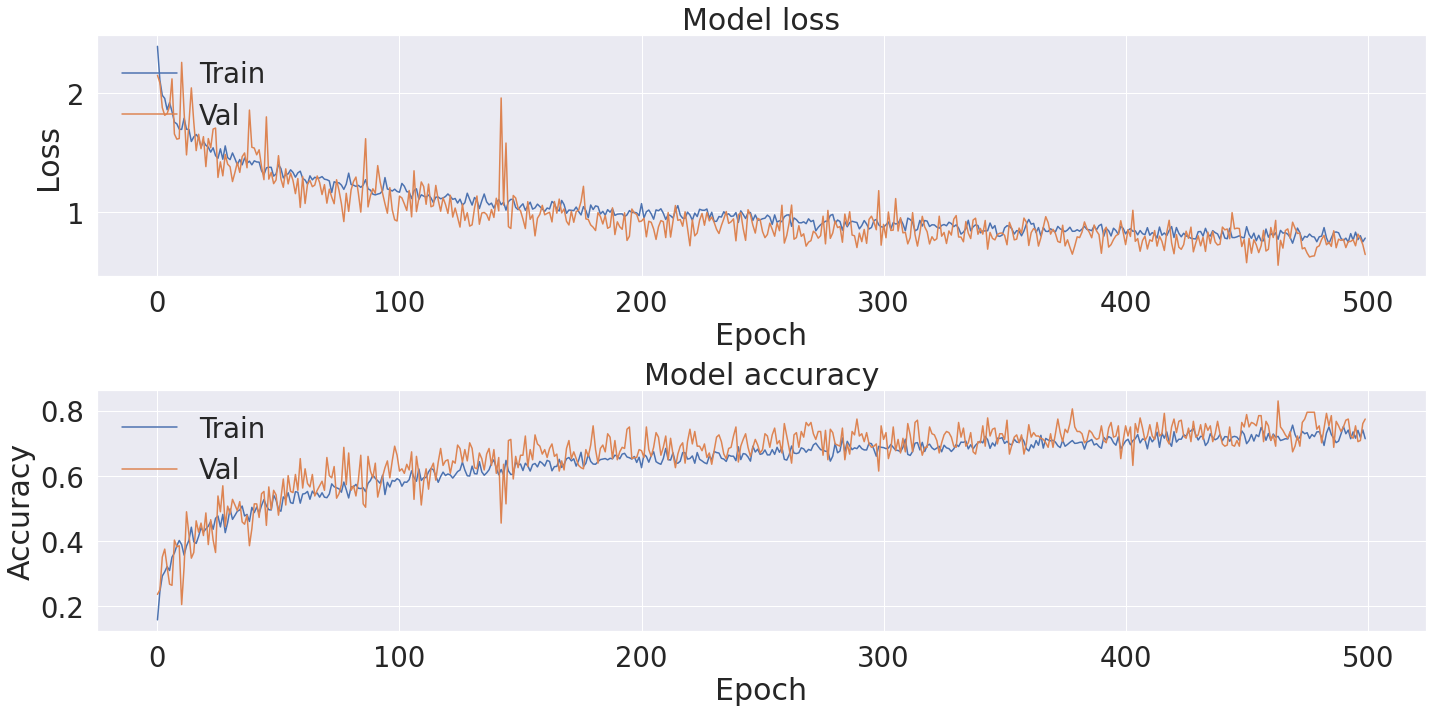

In [21]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_A.history['loss'])
ax[0].plot(history_A.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_A.history['sparse_categorical_accuracy'])
ax[1].plot(history_A.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [22]:
top_model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [23]:
history_Vgg = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 2s 26ms/step - loss: 2.2821 - sparse_categorical_accuracy: 0.1679 - val_loss: 1.8400 - val_sparse_categorical_accuracy: 0.2986
Epoch 2/500
39/39 [==============================] - 1s 21ms/step - loss: 1.8997 - sparse_categorical_accuracy: 0.2956 - val_loss: 1.7296 - val_sparse_categorical_accuracy: 0.3715
Epoch 3/500
39/39 [==============================] - 1s 20ms/step - loss: 1.7671 - sparse_categorical_accuracy: 0.3638 - val_loss: 1.5856 - val_sparse_categorical_accuracy: 0.4167
Epoch 4/500
39/39 [==============================] - 1s 21ms/step - loss: 1.7356 - sparse_categorical_accuracy: 0.3865 - val_loss: 1.5442 - val_sparse_categorical_accuracy: 0.4549
Epoch 5/500
39/39 [==============================] - 1s 20ms/step - loss: 1.6967 - sparse_categorical_accuracy: 0.4108 - val_loss: 1.5447 - val_sparse_categorical_accuracy: 0.4722
Epoch 6/500
39/39 [==============================] - 1s 21ms/step - loss: 1.6365 - sparse_categorica

In [24]:
top_model.evaluate(test_genrator,batch_size=64)

313/313 [==============================] - 3s 10ms/step - loss: 1.1494 - sparse_categorical_accuracy: 0.5976


[1.1494499444961548, 0.597599983215332]

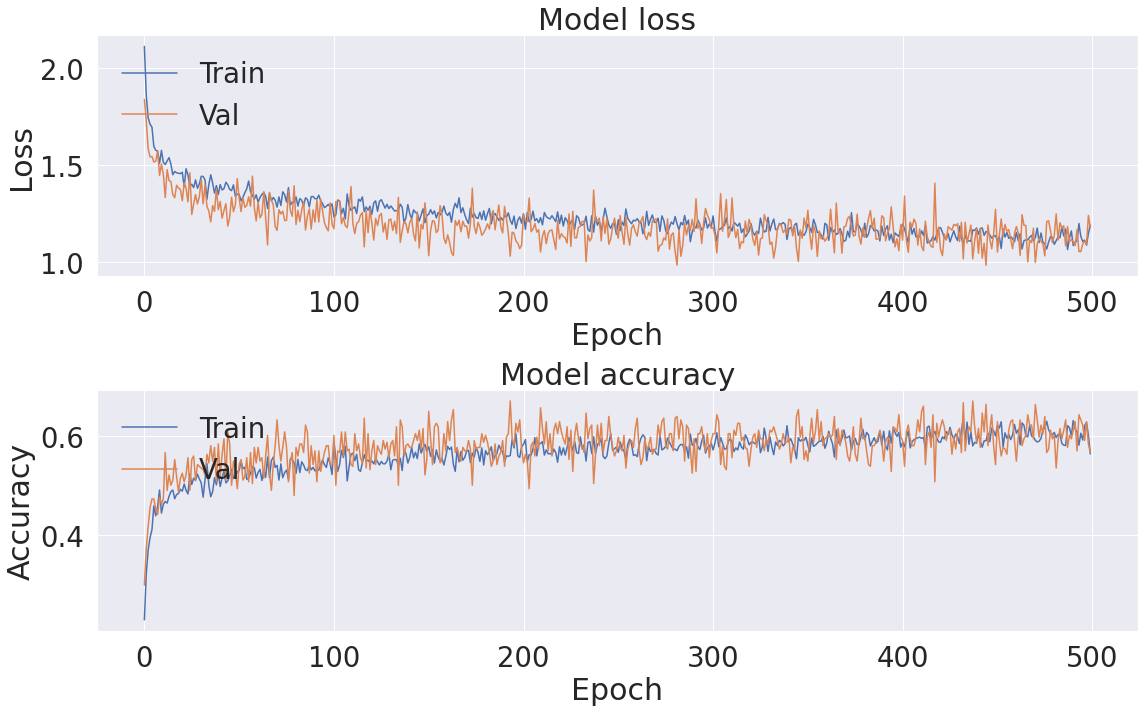

In [25]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Vgg.history['loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Vgg.history['sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

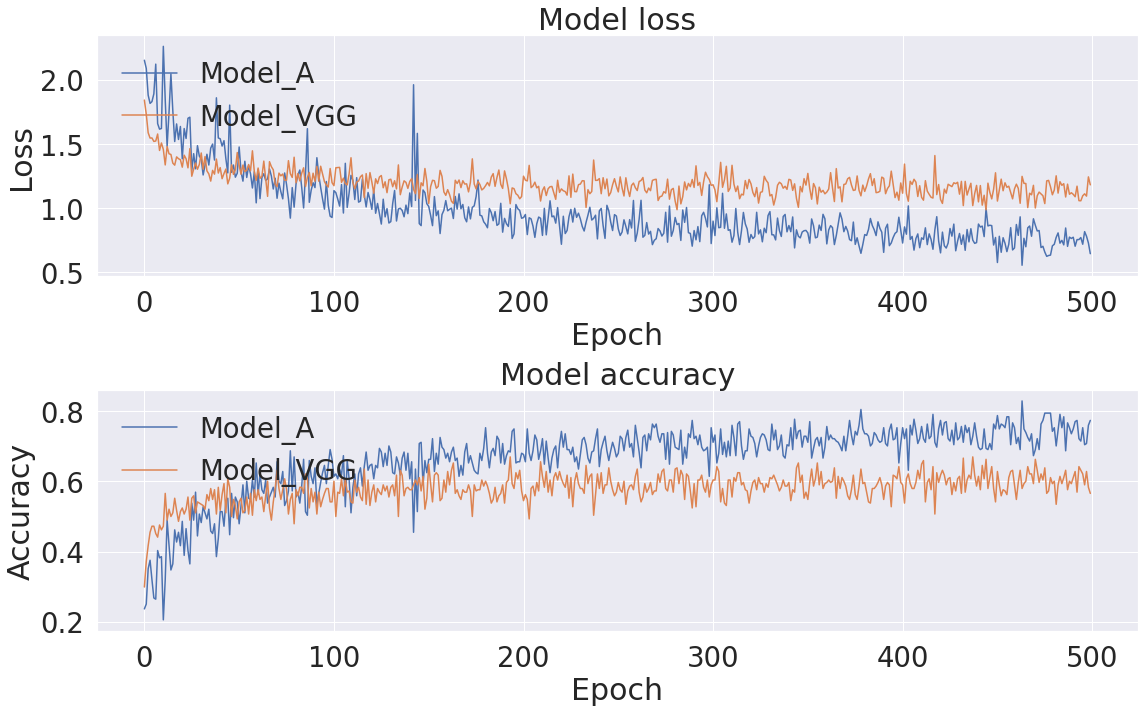

In [26]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_A.history['val_loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Model_A', 'Model_VGG'], loc='upper left')

ax[1].plot(history_A.history['val_sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model_A', 'Model_VGG'], loc='upper left')

f.tight_layout()
plt.show()